<a href="https://colab.research.google.com/github/muhammadghazyy/Sign-Language/blob/main/Sign_Language_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.preprocessing

from google.colab import files

In [2]:
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [5]:
!kaggle datasets download -d datamunge/sign-language-mnist
!unzip sign-language-mnist.zip

sign-language-mnist.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


## PreProcess

In [9]:
train = pd.read_csv('sign_mnist_train.csv')
test  = pd.read_csv('sign_mnist_test.csv')

In [63]:
label = train['label']
labelUnique = np.unique(np.array(label))

24

In [ ]:
train1 = train.copy()
train1.drop('label',axis=1,inplace=True)
train1.values[0]

In [ ]:
# Changing from csv to photo 28x28 pixel format
images = train1.values
images = np.array([np.reshape(i,(28,28)) for i in images])
images[0]

In [ ]:
# Onehot Label
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_onehot = label_binarizer.fit_transform(label)

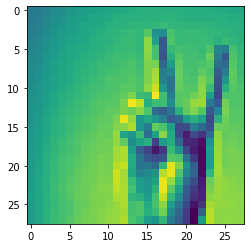

In [49]:
# Test the image
plt.imshow(images[np.random.randint(0,len(label))])

## Model Building

In [95]:
#Setting up train,validation,test
x_train , x_valid , y_train, y_valid = images[:int(0.8*len(train.values))] , images[int(0.8*len(train.values)):], label_onehot[:int(0.8*len(train.values))],label_onehot[int(0.8*len(train.values)):]

In [97]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_valid = x_valid.reshape(x_valid.shape[0],28,28,1)

In [ ]:
x_train = x_train / 255.0
x_vallid = x_valid / 255.0

In [100]:
#Setting up hyperparameters
batch_size = 128
num_classes = 24
epoch_num = 15 

In [104]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64 , (3,3), input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64 , (3,3)))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64 , (3,3)))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256,activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Dense(24,activation='softmax'))

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['acc']
)

In [106]:
history = model.fit(x_train , y_train , validation_data = (x_valid,y_valid),epochs = 15 , batch_size=128 )

Epoch 1/15
172/172 [==============================] - 30s 176ms/step - loss: 0.0031 - acc: 0.9990 - val_loss: 0.0014 - val_acc: 0.9993
Epoch 2/15
172/172 [==============================] - 30s 176ms/step - loss: 0.0172 - acc: 0.9945 - val_loss: 0.0043 - val_acc: 0.9989
Epoch 3/15
172/172 [==============================] - 30s 176ms/step - loss: 0.0445 - acc: 0.9857 - val_loss: 0.0016 - val_acc: 0.9996
Epoch 4/15
172/172 [==============================] - 30s 177ms/step - loss: 0.0244 - acc: 0.9920 - val_loss: 7.5941e-05 - val_acc: 1.0000
Epoch 5/15
172/172 [==============================] - 30s 177ms/step - loss: 0.0131 - acc: 0.9960 - val_loss: 2.7565e-04 - val_acc: 1.0000
Epoch 6/15
172/172 [==============================] - 31s 182ms/step - loss: 0.0077 - acc: 0.9978 - val_loss: 2.4850e-04 - val_acc: 1.0000
Epoch 7/15
172/172 [==============================] - 33s 190ms/step - loss: 0.0184 - acc: 0.9954 - val_loss: 0.0057 - val_acc: 0.9978
Epoch 8/15
172/172 [=======================

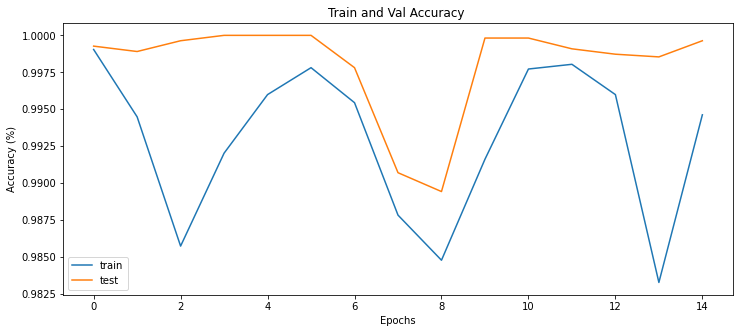

In [112]:
#Plotting accuracy
plt.figure(figsize=(12,5))
plt.title('Train and Val Accuracy ')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

In [107]:
model.save('sign_model.h5')

In [128]:
# Testing test data set
test_label = test['label']
test_label_onehot = label_binarizer.fit_transform(test_label)

In [ ]:
test.drop('label',axis=1,inplace=True)

In [124]:
test_x = test.values
test_x = np.array([np.reshape(i,(28,28)) for i in test_x])
test_x = test_x.reshape(test_x.shape[0],28,28,1)

In [132]:
pred = model.predict(test_x)

In [149]:
import sklearn.metrics

print("ROC-AUC Score:",sklearn.metrics.roc_auc_score(test_label_onehot , pred.round()))
print("Accuracy:",sklearn.metrics.accuracy_score(test_label_onehot,pred.round()))

ROC-AUC Score: 0.9349999314422782
Accuracy: 0.884132738427217
